In [1]:
import pandas as pd

LOCAL = '../data/tanzania/'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/tanzania/'

train_features = pd.read_csv(WEB + 'train_features.csv')
train_labels = pd.read_csv(WEB + 'train_labels.csv')
test_features = pd.read_csv(WEB + 'test_features.csv')
sample_submission = pd.read_csv(WEB + 'sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_train = train_features
y_train = train_labels['status_group']

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  random_state = 42)

In [5]:
X_train.shape, X_val.shape

((44550, 40), (14850, 40))

In [6]:
baseline = y_train.mode()[0]
baseline

'functional'

In [7]:
from sklearn.metrics import accuracy_score

y_pred = [baseline] * len(y_train)

baseline_accuracy = accuracy_score(y_train, y_pred)

print(f'Baseline Accuracy Score: {baseline_accuracy:.3f}')

Baseline Accuracy Score: 0.542


In [8]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn_pandas import DataFrameMapper

In [16]:
pip install pandas-profiling

  Using cached https://files.pythonhosted.org/packages/2b/de/6e4dd6d720c49939544352155dc06a08c9f7e4271aa631a559dfbeaaf9d4/missingno-0.4.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b3/e7/fcd59e12169de19f0131ff2812077f964c6b960e7c09804d30a7bf2ab461/htmlmin-0.1.12.tar.gz
  Using cached https://files.pythonhosted.org/packages/45/ad/24a16fa4ba612fb96a3c4bb115a5b9741483f53b66d3d3afd987f20fa227/phik-0.9.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4c/6f/90e860cba937c174d8b3775729ccc6377eb91f52ad4eeb008e7252a3646d/confuse-1.0.0.tar.gz
  Stored in directory: C:\Users\Richard_2\AppData\Local\pip\Cache\wheels\c7\c6\58\3a7be8f84fbe64a88f8c3e5cf0360e5abfbdc321d3d421df21
  Stored in directory: C:\Users\Richard_2\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: C:\Users\Richard_2\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfu

In [17]:
import pandas_profiling

In [18]:
X_train.profile_report(style={'full_width':True})

In [19]:
from sklearn_pandas import gen_features

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [22]:
import category_encoders as ce

In [69]:
scaler = MinMaxScaler
hash_encoder = ce.HashingEncoder
ordinal_encoder = ce.OrdinalEncoder
one_hot_encoder = ce.OneHotEncoder
binary_encoder = ce.BinaryEncoder

In [70]:
one_hot_features = gen_features(
    columns = [['extraction_type_class'], ['management_group'], ['source_class'], ['waterpoint_type_group']],
    classes = [{'class': one_hot_encoder, 'use_cat_names': 'True'}]
)

ordinal_features = gen_features(
    columns = [['quality_group'], ['quantity']],
    classes = [ordinal_encoder]
)

hash_features = gen_features(
    columns = [['region']],
    classes = [hash_encoder]
)

binary_features = gen_features(
    columns = [['funder'], ['installer'], ['subvillage'], ['ward']],
    classes = [binary_encoder])

scaling_features = gen_features(
    columns = [['gps_height'], ['longitude'], ['latitude']],
    classes = [scaler]
)

mapping_features = one_hot_features + ordinal_features + hash_features + binary_features + scaling_features

mapper = DataFrameMapper(mapping_features)

In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs', 
                           max_iter = 10000, 
                           random_state = 42)

In [72]:
X_train_mapped = mapper.fit_transform(X_train)
X_val_mapped = mapper.transform(X_val)

C:\ProgramData\Anaconda3_\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [73]:
model.fit(X_train_mapped, y_train)

C:\ProgramData\Anaconda3_\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
y_pred = model.predict(X_val_mapped)

In [75]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy Score: {accuracy:.3f}')

Accuracy Score: 0.692


In [65]:
X_test = test_features
X_test = mapper.transform(X_test)
y_pred = model.predict(X_test)

In [82]:
import numpy as np

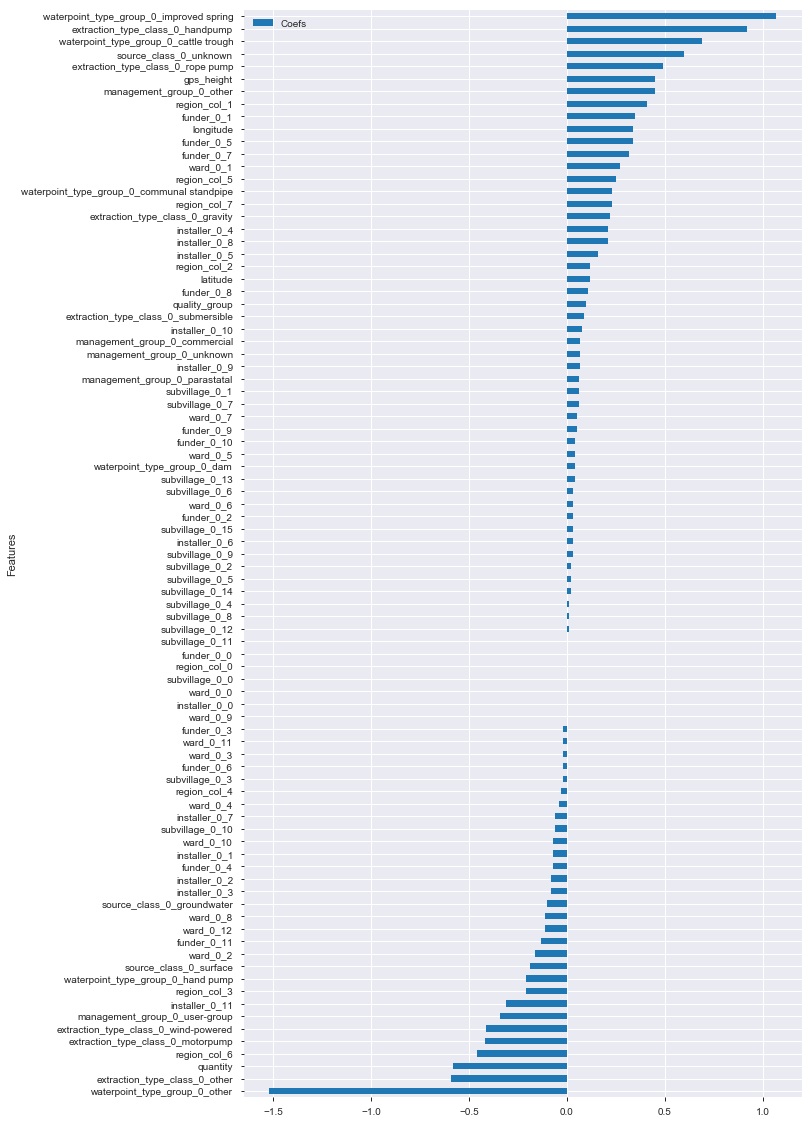

In [90]:
coefs = np.round(model.coef_[0], 2)
feature_names = np.array(mapper.transformed_names_)
coefs_df = pd.DataFrame({'Features': feature_names, 'Coefs': coefs})
coefs_df.sort_values(by = 'Coefs').plot.barh(x = 'Features', y = 'Coefs', figsize = (10, 20))

In [96]:
X_test = test_features
X_test = mapper.transform(X_test)
y_pred = model.predict(X_test)

submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('rgolds-submission-2.csv', index = False)

In [98]:
#from IPython.display import FileLink, FileLinks
#FileLinks('.') #lists all downloadable files on server